In [1]:
import ast
import os
import itertools
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data
games = pd.read_csv("Data/games_detailed_info.csv", index_col=0) # review stats

In [3]:
n_rows, n_cols = games.shape

In [4]:
# 1. Remove columns with > 20% of NA values 
na_threshold = 0.2
key_columns = [colname for colname in games.columns if games[colname].isna().sum() <= na_threshold*n_rows]

print("Columns with > {}% of NA values: \n".format(na_threshold*100), set(games.columns)-set(key_columns))

Columns with > 20.0% of NA values: 
 {'Thematic Rank', 'Family Game Rank', 'RPG Item Rank', 'boardgamefamily', 'Accessory Rank', 'Amiga Rank', 'Arcade Rank', 'War Game Rank', 'Atari ST Rank', "Children's Game Rank", 'Party Game Rank', 'Commodore 64 Rank', 'boardgameintegration', 'alternate', 'boardgamecompilation', 'boardgameexpansion', 'Abstract Game Rank', 'Strategy Game Rank', 'Video Game Rank', 'boardgameimplementation', 'Customizable Rank', 'boardgameartist'}


In [5]:
# 2. Remove redundant/unnecesary columns
unnecessary_columns = ["type", "thumbnail", "image", "suggested_num_players", "suggested_playerage", 
                       "suggested_language_dependence"]
key_columns = [x for x in key_columns if x not in unnecessary_columns]

In [6]:
# 3. Rename confusing column names
games = games.loc[:,key_columns]
games.rename(columns={"primary": "name", "usersrated": "numratings", "average": "avgrating",
                      "boardgamecategory": "category", "boardgamemechanic": "mechanic", 
                      "boardgamedesigner": "designer", "boardgamepublisher": "publisher", 
                      "bayesaverage": "bayesavgrating", "Board Game Rank": "rank", 
                      "stddev": "stdrating", "median": "medianrating",
                      "owned": "numowned", "trading": "numtrades", "wanting":"numwants", 
                      "wishing": "numwishes"}, inplace=True)

In [7]:
# 4. Parse columns with list values
# Convert list of strings to list
for list_col in ["category", "mechanic", "designer", "publisher"]:
    games[list_col] = games[list_col].apply(lambda x: ast.literal_eval(x) if not(pd.isna(x)) else [])

In [8]:
def create_df_with_binary_columns(df, colname, n_binary_cols):
    """
    TBD
    """
    new_df = df.copy()
    cnt = list(itertools.chain.from_iterable(df[colname]))
    cnt = Counter(cnt)
    common_items = [x[0] for x in cnt.most_common(n_binary_cols)]
    for col in common_items:
        new_df[col] = new_df[colname].apply(lambda x: col in x)
    return(new_df, cnt.most_common(n_binary_cols))

In [9]:
# Create new dataframes with binary columns of 20 popular items
games_category, category_cnt = create_df_with_binary_columns(games, "category", 20)
games_mechanic, mechanic_cnt = create_df_with_binary_columns(games, "mechanic", 20)
games_designer, designer_cnt = create_df_with_binary_columns(games, "designer", 20)
games_publisher, publisher_cnt = create_df_with_binary_columns(games, "publisher", 20)

In [10]:
# Plot the histogram of popular items
all_cnts = [("category", category_cnt), ("mechanic", mechanic_cnt), 
           ("designer", designer_cnt), ("publisher", publisher_cnt)]

/Users/yeinkim/miniconda2/envs/ece143-project/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


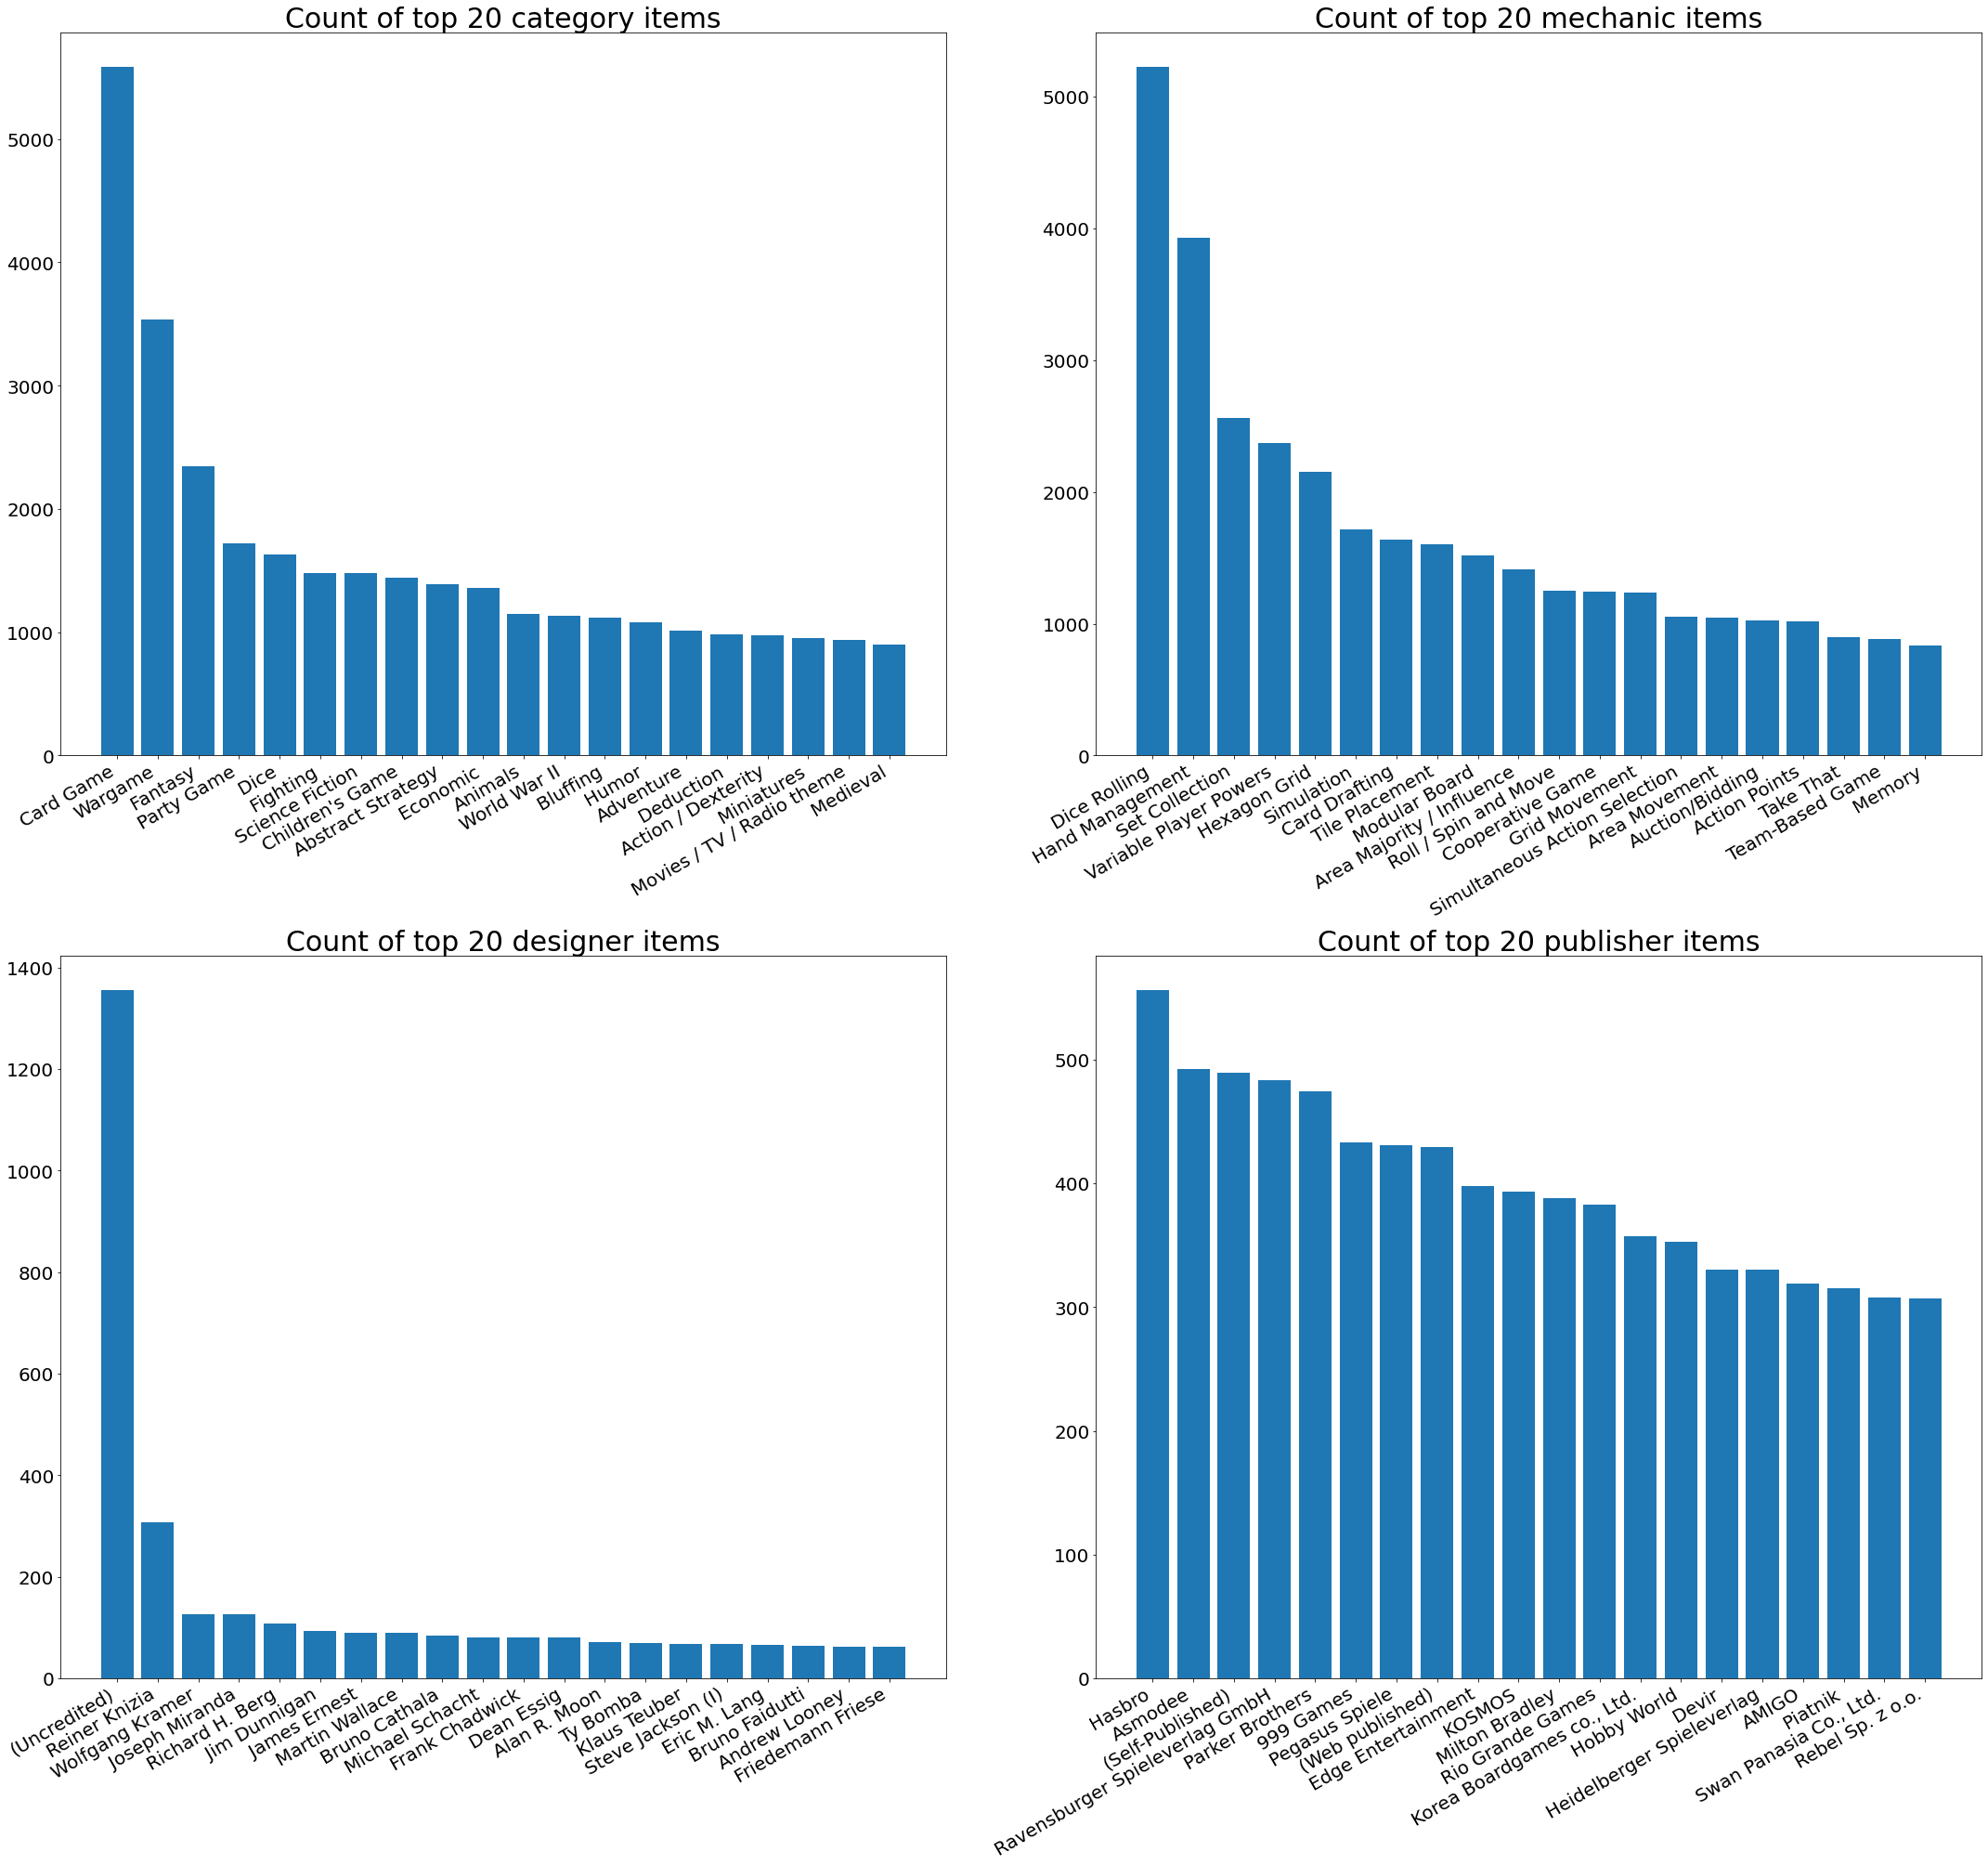

In [11]:
fig = plt.figure(figsize=(30,28))

for i, tup in enumerate(all_cnts):
    ax = plt.subplot(2, 2, i+1)
    ax.bar([x[0] for x in tup[1]], [x[1] for x in tup[1]])
    ax.set_xticklabels([x[0] for x in tup[1]], rotation=30,  ha="right")
    ax.set_title("Count of top 20 {} items".format(tup[0]), fontsize=30)
    ax.tick_params(labelsize=20)
fig.tight_layout()